Model of Neural System

Computer Practical 7

Bramantyo Ibrahim Supriyatno

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 1. Hodgkin-Huxley model of action potential generation

In [189]:
def alpha_n(v):
    # v in mV
    alpha_ms =  0.01 * (v  + 55) / (1 - math.exp(-0.1 * (v + 55)))
    return alpha_ms

In [190]:
def beta_n(v):
    # v in mV
    beta_ms = 0.125 * math.exp(-0.0125*(v + 65))
    return beta_ms

In [191]:
def alpha_m(v):
    return 0.1 * (v+40) / (1-math.exp(-0.1*(v + 40)))

In [192]:
def beta_m(v):
    return 4 * math.exp(-0.0556*(v+65))

In [193]:
def alpha_h(v):
    return 0.07 * math.exp(-0.05 * (v + 65))

In [194]:
def beta_h(v):
    return 1 / (1 + math.exp(-0.1 * (v+35)))

In [195]:
def first_order_kinetic(a_func, b_func, v, x):
    return a_func(v)*(1.-x) - b_func(v)*x    

In [196]:
def sodium_current(v, m, h, e_na=50, conductance=120e-9):
    return conductance*(m**3)*h*(v - e_na) *1e-3

In [197]:
def potassium_current(v, n, e_k=-77, conductance=36e-9):#v in mV
    return conductance * (n**4) * (v - e_k) *1e-3

In [198]:
def leak_current(v, e_leak=-54.387, conductance=0.3e-9):
    return conductance*(v - e_leak)*1e-3

In [199]:
def hodgkin_huxley_model(v, i_na, i_k, i_leak, i_e, cm):
    return (-i_na - i_k - i_leak + i_e) / cm    

In [200]:
def hh_euler(params, init_values, t, dt):
    v_res = np.zeros((t.shape[0]+1))
    ms = np.zeros_like(v_res)
    hs = np.zeros_like(v_res)
    ns = np.zeros_like(v_res)    
    i_nas = np.zeros_like(v_res) 
    i_ks = np.zeros_like(v_res)
    i_leaks = np.zeros_like(v_res)
    ie = np.zeros_like(v_res)
    
    v_res[0] = init_values['v']
    ms[0] = init_values['m']
    hs[0] = init_values['h']
    ns[0] = init_values['n']    
    
    if params['is_i_time_dependent']:        
        idx_triggered = t>params['t_trigger']
        ie[idx_triggered] = params['ie']
        ie[~idx_triggered] = params['ie_pt']         
    else:
        ie.fill(params['ie'])
    
    for i in range(1, v_res.shape[0]): 
        ns[i] = ns[i-1] + dt *  first_order_kinetic(alpha_n, beta_n, v_res[i-1], ns[i-1])
        ms[i] = ms[i-1] + dt *  first_order_kinetic(alpha_m, beta_m, v_res[i-1], ms[i-1])
        hs[i] = hs[i-1] + dt *  first_order_kinetic(alpha_h, beta_h, v_res[i-1], hs[i-1])
        
        i_nas[i] = sodium_current(v_res[i-1], ms[i-1], hs[i-1])
        i_ks[i] = potassium_current(v_res[i-1], ns[i-1])
        i_leaks[i] = leak_current(v_res[i-1]) 
        
        v_res[i] = v_res[i-1] + dt * hodgkin_huxley_model(v_res[i-1], i_nas[i], i_ks[i], i_leaks[i], ie[i], params['cm'])
        
    return v_res[1:], i_leaks[1:], i_ks[1:], i_nas[1:], hs[1:], ms[1:], ns[1:]

In [217]:
init_values = {}
init_values['v'] = -65
init_values['m'] = 0.0529
init_values['h'] = 0.5961
init_values['n'] = 0.3177

params = {}
params['is_i_time_dependent'] = False
params['ie'] = 0
params['cm'] = 1e-12

del_t =1e-3
t = np.arange(0, 50, step=del_t)
ret = hh_euler(params, init_values, t, del_t)

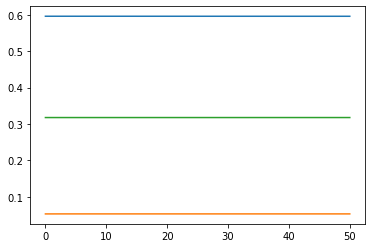

In [218]:
plt.plot(t,ret[-3], label='h')
plt.plot(t,ret[-2], label='m')
plt.plot(t,ret[-1], label='s')

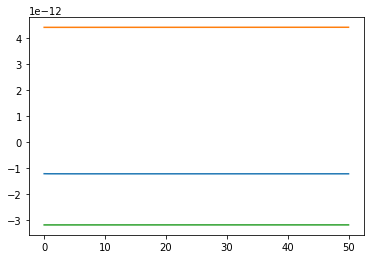

In [219]:
plt.plot(t,ret[3], label='na')
plt.plot(t,ret[2], label='k')
plt.plot(t,ret[1], label='l')

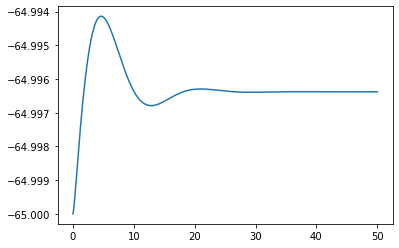

In [221]:
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.plot(t,ret[0], label='V')

## B

In [222]:
params['ie'] = 20e-12
ret = hh_euler(params, init_values, t, del_t)

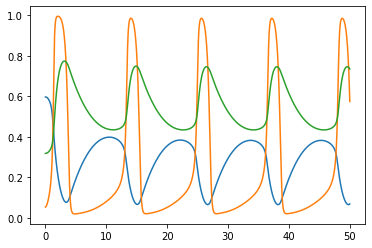

In [223]:
plt.plot(t,ret[-3], label='h')
plt.plot(t,ret[-2], label='m')
plt.plot(t,ret[-1], label='s')

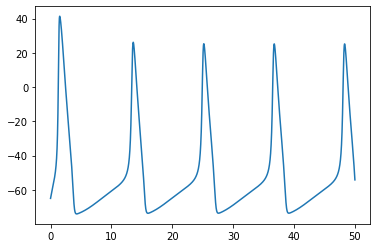

In [224]:
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.plot(t,ret[0], label='V')

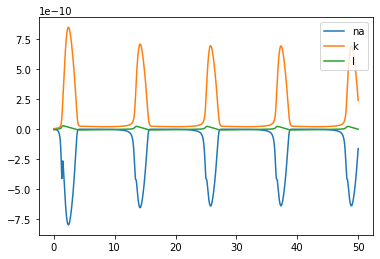

In [225]:
plt.plot(t,ret[3], label='na')
plt.plot(t,ret[2], label='k')
plt.plot(t,ret[1], label='l')
plt.legend()

## C

In [235]:
ies = np.linspace(0,20e-12,20).tolist()

vms = []
for ie in ies:
    params['ie'] = ie
    ret = hh_euler(params, init_values, t, del_t)
    vms.append(ret[0])

In [239]:
def find_local_maxima(series):
    return np.r_[True, series[1:] < series[:-1]] & np.r_[series[:-1] < series[1:], True]

In [236]:
def compute_firing_rate(series, t):
    series 
    num_spikes = np.argwhere(series == np.max(series)).ravel().shape[0]
    return num_spikes / (np.max(t) -np.min(t))

20

In [245]:
find_local_maxima(vms[0][)

array([False, False, False, ..., False, False, False])